# CP 322 - Final Project

Aditya Chauhan (169027493)

### Dataset Choice

- [Student Performance Dataset](https://archive.ics.uci.edu/dataset/320/student+performance)

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Read Data

In [2]:
data = pd.read_csv("student-mat.csv", sep=";")

## Data Quality Report

#### Dataset Shape:

The shape of the data's distribution can help with finding descriptive statistics.

#### Dataset Columns:

The columns of a dataset (Descriptive & Target Features).

#### Missing Values

Prints the number of missing values in all columns.

### Data Types

Seeing what datatypes we're working with can provide insight on how to handle information.

### Summary Statistics (Numerical Data Analysis)

Can provide insight for the numerical features, as to the relative scale of the data points. 

### Categorical Data Analysis

Gives insight into the binary split of non-numerical features. Can help with generalizing the data. 

In [3]:
print("====== Data Quality report ======")

def generate_data_quality_report(df):

    print("\nDataset Shape: \n", df.shape) # Needs to be improved

    print("\nColumns: \n", df.columns.tolist())

    missing_values = df.isnull().sum()
    print("\nMissing Values: \n", missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values") # Must print missing values for each feature (Each feature should have the same number of "nodes")

    print("\nData Types: \n", df.dtypes)

    print("\nNumerical Columns Summary:\n", df.describe())

    categorical_cols = df.select_dtypes(include=['object']).columns
    print("\nCategorical Columns Analysis:")
    for col in categorical_cols:
        print(f"\nUnique values in {col}:\n", df[col].value_counts())
        
    return df

generate_data_quality_report(data)        

====== Data Quality report ======

Dataset Shape: 
 (395, 33)

Columns: 
 ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Missing Values: 
 No missing values

Data Types: 
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Basic Visualizations

====== Basic Visualizations ======



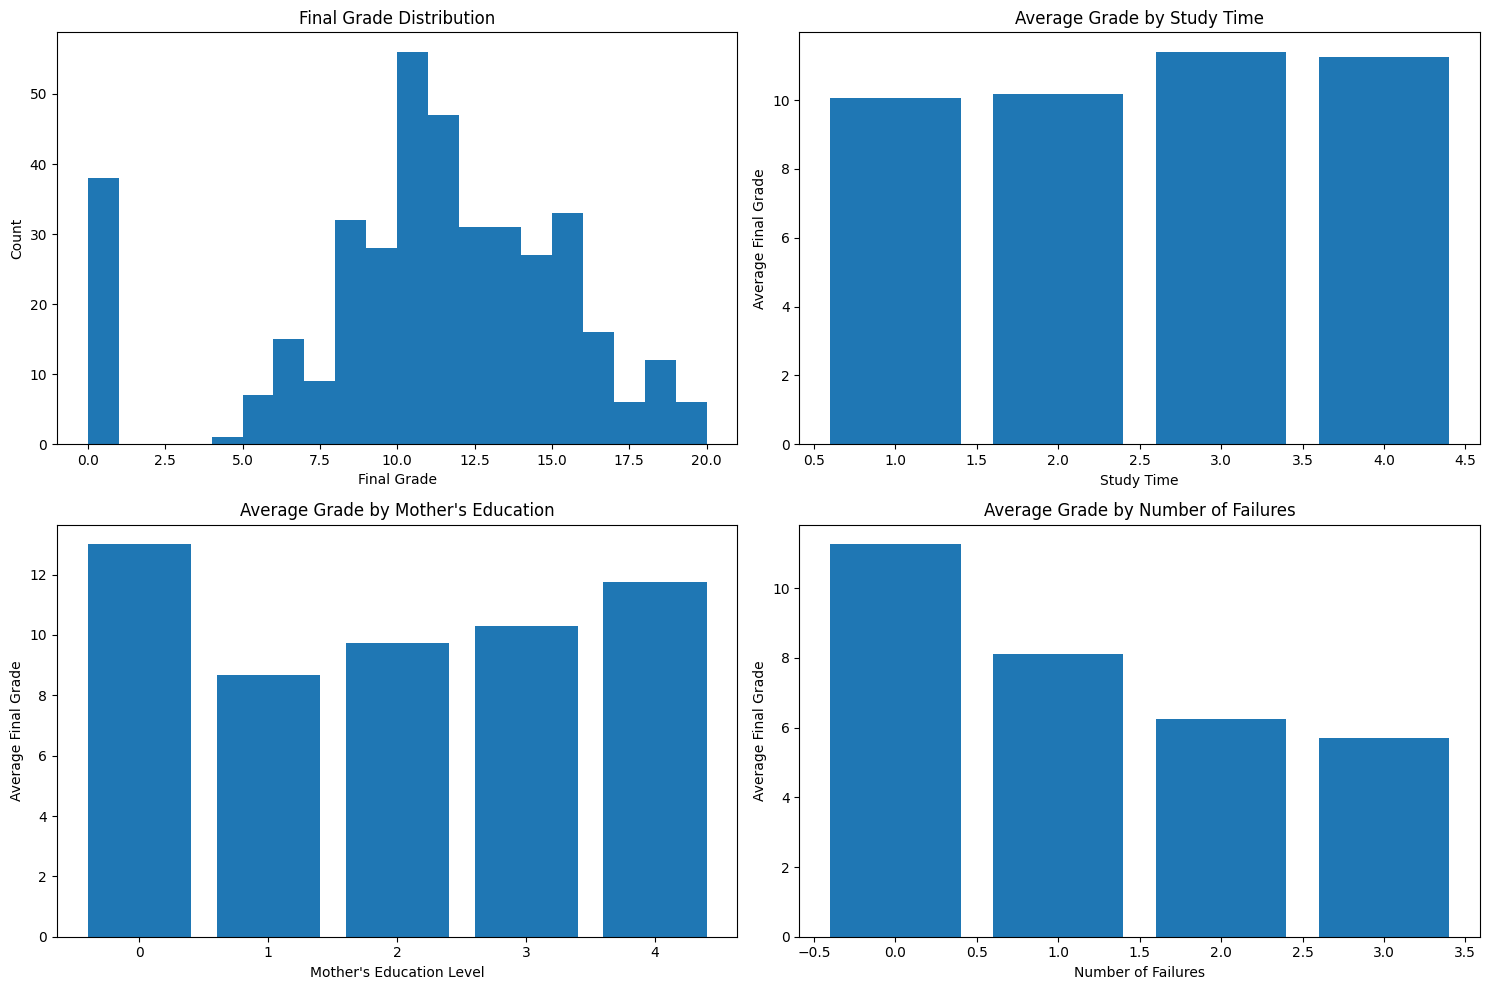

In [5]:
def create_basic_visualizations(df):

    print("====== Basic Visualizations ======\n")
    
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.hist(df['G3'].values, bins=20)
    plt.title('Final Grade Distribution')
    plt.xlabel('Final Grade')
    plt.ylabel('Count')

    plt.subplot(2, 2, 2)

    study_time_means = []
    study_times = sorted(df['studytime'].unique())
    for st in study_times:
        mean_grade = df[df['studytime'] == st]['G3'].mean()
        study_time_means.append(mean_grade)
    plt.bar(study_times, study_time_means)
    plt.title('Average Grade by Study Time')
    plt.xlabel('Study Time')
    plt.ylabel('Average Final Grade')
    
    # Mother's education vs final grade

    plt.subplot(2, 2, 3)

    # Calculate mean grades for each mother's education level

    medu_means = []
    medu_levels = sorted(df['Medu'].unique())
    for edu in medu_levels:
        mean_grade = df[df['Medu'] == edu]['G3'].mean()
        medu_means.append(mean_grade)
    plt.bar(medu_levels, medu_means)
    plt.title("Average Grade by Mother's Education")
    plt.xlabel("Mother's Education Level")
    plt.ylabel('Average Final Grade')
    
    # Failures vs final grade

    plt.subplot(2, 2, 4)

    # Calculate mean grades for each number of failures

    failure_means = []
    failure_counts = sorted(df['failures'].unique())
    for f in failure_counts:
        mean_grade = df[df['failures'] == f]['G3'].mean()
        failure_means.append(mean_grade)
    plt.bar(failure_counts, failure_means)
    plt.title('Average Grade by Number of Failures')
    plt.xlabel('Number of Failures')
    plt.ylabel('Average Final Grade')
    
    plt.tight_layout()
    plt.show()

create_basic_visualizations(data)